# BUSINESS CONTEXT:
In this project it requires to develop a customer segmentation to define marketing strategy through machine learning techniqe. The sample dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

# Goal of Model:
Advanced data preparation: Build an ‘enriched’ customer profile by deriving “intelligent” KPIs such as:

1- Monthly average purchase and cash advance amount

2- Purchases by type (one-off, installments)

3- Average amount per purchase and cash advance transaction,

4- Limit usage (balance to credit limit ratio),

5- Payments to minimum payments ratio etc.

6- Advanced reporting: Use the derived KPIs to gain insight on the customer profiles.

7- Identification of the relationships/ affinities between services.

8- Clustering: Apply a data reduction technique factor analysis for variable reduction technique and a clustering algorithm  to reveal the behavioural segments of credit card holders

9- Identify cluster characterisitics of the cluster using detailed profiling.

10- Provide the strategic insights and implementation of strategies for given set of cluster characteristics

# Import Library


In [ ]:
#Basic python library which need to import
import pandas as pd
import numpy as np

#Date stuff
from datetime import datetime
from datetime import timedelta

#Library for Nice graphing
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sn
%matplotlib inline

#Library for statistics operation
import scipy.stats as stats

# Date Time library
from datetime import datetime

#Machine learning Library
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error, mean_squared_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load data

In [ ]:
# reading data into dataframe
credit= pd.read_csv("/content/CC_GENERAL.csv")
credit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Data Cleaning

In [ ]:
# Dropping irrelevant variables
credit.drop('CUST_ID',inplace=True,axis=1)

In [ ]:
# Find the total number of missing values in the dataframe
credit.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# counting missing percent from continuous variable
missper = credit.isnull().sum()/credit.shape[0]*100
missper

BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

# Missing value imputation

In [ ]:
# Missing values are float data types so we deal them with mean
credit['CREDIT_LIMIT'].fillna(credit['CREDIT_LIMIT'].mean(),inplace=True)
credit['MINIMUM_PAYMENTS'].fillna(credit['MINIMUM_PAYMENTS'].mean(),inplace=True)

In [ ]:
credit.isnull().any()

BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

No missing values are in the data

In [ ]:
# printing total numbers of Unique value in the dataframe. 
print ("\nUnique values :  \n",credit.nunique())


Unique values :  
 BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         206
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8637
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64


In [ ]:
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


# Handling outliers
There are some extreame high or extream low value which need to rectify so that it will not have impact on our model

In [ ]:
#Handling Outliers for numerical data
credit = credit.apply(lambda x: x.clip(lower = x.quantile(0.05), upper = x.quantile(0.95)))

In [ ]:
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1452.399593,1688.929294,8.814518,128.281915,873.385231,2054.140036,5909.111808
BALANCE_FREQUENCY,8950.0,0.883252,0.218438,0.272727,0.888889,1.000000,1.000000,1.000000
PURCHASES,8950.0,823.863022,1099.813081,0.000000,39.635000,361.280000,1110.130000,3998.619500
ONEOFF_PURCHASES,8950.0,447.948730,746.133555,0.000000,0.000000,38.000000,577.405000,2671.094000
INSTALLMENTS_PURCHASES,8950.0,336.336040,497.830168,0.000000,0.000000,89.000000,468.637500,1750.087500
CASH_ADVANCE,8950.0,817.161146,1349.178282,0.000000,0.000000,0.000000,1113.821139,4647.169122
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,8950.0,0.127637,0.176670,0.000000,0.000000,0.000000,0.222222,0.583333


# Deriving New KPI
1. Monthly average purchase and cash advance amount

In [ ]:
# Monthly average = purchase/tenure
# purchase = total amount spent in last 12 months
# Tenure = No. of months as a customer
credit['Monthly_avg_purchase']=credit['PURCHASES']/credit['TENURE']

In [ ]:
print(credit['Monthly_avg_purchase'].head())
print(credit['TENURE'].head(),'\n', credit['PURCHASES'].head())

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64
0    12.0
1    12.0
2    12.0
3    12.0
4    12.0
Name: TENURE, dtype: float64 
 0      95.40
1       0.00
2     773.17
3    1499.00
4      16.00
Name: PURCHASES, dtype: float64


2. **Monthly_cash_advance** *Amount*

In [ ]:
# Monthly cash advance = cash advance/tenure
# Cash advance = Total cash advance amount
credit['Monthly_cash_advance']=credit['CASH_ADVANCE']/credit['TENURE']

In [ ]:
print(credit['Monthly_cash_advance'].head())
print(credit['TENURE'].head(),'\n', credit['CASH_ADVANCE'].head())

0      0.000000
1    387.264093
2      0.000000
3     17.149001
4      0.000000
Name: Monthly_cash_advance, dtype: float64
0    12.0
1    12.0
2    12.0
3    12.0
4    12.0
Name: TENURE, dtype: float64 
 0       0.000000
1    4647.169122
2       0.000000
3     205.788017
4       0.000000
Name: CASH_ADVANCE, dtype: float64


3. limit **usage**

In [ ]:
# Limit usage means limit of card for the user
# limit_usage = Balance/Credit_Limit
# Balance = Monthly avg balance
# Cred_Limit = Limit of credit card
credit['limit_usage']=credit['BALANCE']/credit['CREDIT_LIMIT']

In [ ]:
print(credit['limit_usage'].head())
print(credit['BALANCE'].head(),'\n', credit['CREDIT_LIMIT'].head())

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: limit_usage, dtype: float64
0      40.900749
1    3202.467416
2    2495.148862
3    1666.670542
4     817.714335
Name: BALANCE, dtype: float64 
 0    1000.0
1    7000.0
2    7500.0
3    7500.0
4    1200.0
Name: CREDIT_LIMIT, dtype: float64


# 4. Purchases by type (one-off, installments)
To find what type of purchases customers are making on credit card

In [ ]:
credit.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
...,...,...
8945,0.00,291.12
8946,0.00,300.00
8947,0.00,144.40
8948,0.00,0.00


In [ ]:
# Find customers ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES details
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 20)

In [ ]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 20)

In [ ]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 20)

In [ ]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 20)

As per above detail we found out that there are 4 types of purchase behaviour in the data set. So we need to derive a categorical variable based on their behaviour

In [ ]:
def purchase(credit):
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_installment'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0):
        return 'istallment'

In [ ]:
credit['purchase_type']=credit.apply(purchase,axis=1)
credit['purchase_type'].value_counts()

both_oneoff_installment    2774
istallment                 2260
none                       2042
one_off                    1874
Name: purchase_type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


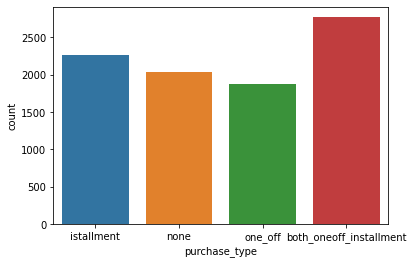

In [ ]:
sns.countplot(credit['purchase_type'])

From above we can see the uses of the credit card and most peoples are using credit card for both installment and oneoff

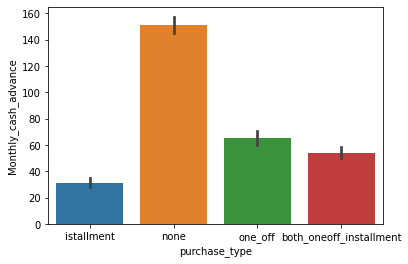

In [ ]:
# which purchase type having more cash in month
sns.barplot(x='purchase_type',y='Monthly_cash_advance',data=credit)

From above graph we can see NONE type having more advance cash

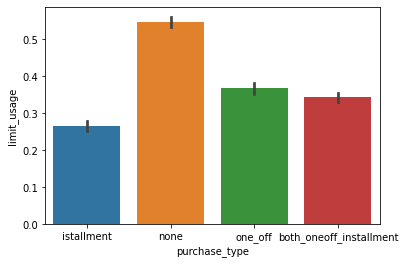

In [ ]:
# Which purchase type having higher using limit
sns.barplot(x='purchase_type',y='limit_usage',data=credit)

None type having higher limit usage

In [ ]:
# Checking features of category
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT

Only purchase_type is *categorical* column so we change it into numerical column

# Handling Categorical Variables

In [ ]:
# Creating dummies for categorical variable
Dum_var = pd.get_dummies(credit['purchase_type'],drop_first = True)

In [ ]:
credit.drop('purchase_type',axis=1,inplace=True)
credit = pd.concat([credit,Dum_var],axis=1)

In [ ]:
credit.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,istallment,none,one_off
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,201.802084,139.509787,0.000000,12.0,7.950000,0.000000,0.040901,1,0,0
1,3202.467416,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.000000,0.000000,0.250000,...,4103.032597,1072.340217,0.222222,12.0,0.000000,387.264093,0.457495,0,1,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,622.066742,627.284787,0.000000,12.0,64.430833,0.000000,0.332687,0,0,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,89.988924,864.206542,0.000000,12.0,124.916667,17.149001,0.222223,0,0,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,678.334763,244.791237,0.000000,12.0,1.333333,0.000000,0.681429,0,0,1


In [ ]:
# correlation matrix
corrm = credit.corr()
#corrm.to_csv('corrm.csv')
print(corrm.to_string())

                                   BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  Monthly_avg_purchase  Monthly_cash_advance  limit_usage  istallment      none   one_off
BALANCE                           1.000000           0.370254   0.124336          0.138493                0.040367      0.565401            -0.102891                    0.070789                         -0.089514                0.489843          0.487851       0.086826      0.510504  0.347819          0.764228         -0.359881  0.075801              0.120453              0.542928     0.584793   -0.232155  0.182315 -0.028233
BALANCE_FREQUENCY                 0.370254           1.000000   0.192937          0.153188                0.170524      0.116485             0.2

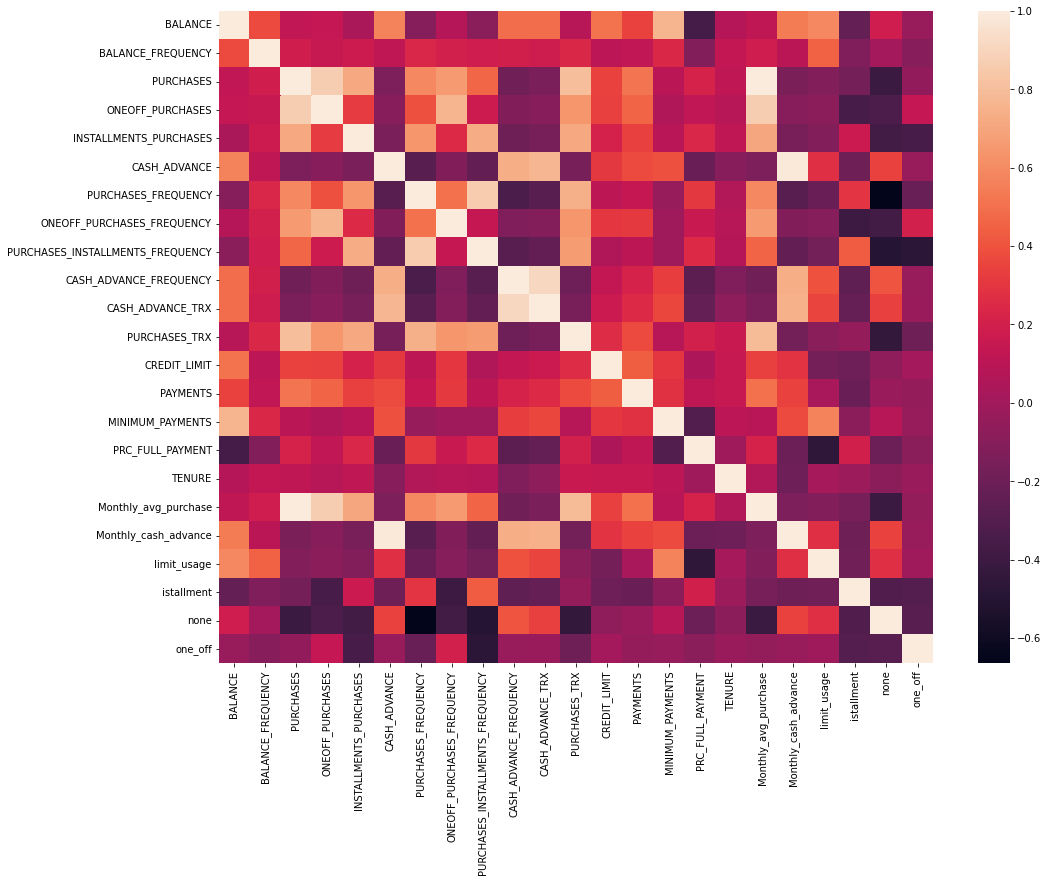

In [ ]:
#heatmap showing correlation
plt.figure(figsize = (16, 12))
sns.heatmap(credit.corr())

Correlation shows that many features are co-related so applying dimensionality reduction will help negating multi-colinearity in data

# Standardrizing data
To put data on the same scale

In [ ]:
from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()
credit_scale = sc.fit_transform(credit)

# Applying PCA
With the help of principal component analysis we will reduce features

In [ ]:
from sklearn.decomposition import PCA
credit_scale.shape

(8950, 23)

There are 23 features and we need to decompose it to minimum feature

In [ ]:
#Lets check if we will take 20 component then how much varience it explain. Ideally it should be 1 i.e 100%
pc=PCA(n_components=23)
cr_pca=pc.fit(credit_scale)
sum(cr_pca.explained_variance_ratio_)

1.0

In [ ]:
var_ratio={}
for n in range(2,21):
    pc=PCA(n_components=n)
    cr_pca=pc.fit(credit_scale)
    var_ratio[n]=sum(cr_pca.explained_variance_ratio_)

var_ratio

{2: 0.5067120701214625,
 3: 0.6074647545102321,
 4: 0.6836582055752619,
 5: 0.735138365351782,
 6: 0.784953384767918,
 7: 0.8241373650640628,
 8: 0.855575626015734,
 9: 0.8845737228986928,
 10: 0.9058421697852104,
 11: 0.9249187530188888,
 12: 0.9427654772903323,
 13: 0.9568446415391568,
 14: 0.9663902669823464,
 15: 0.9752124564186643,
 16: 0.9826207575532117,
 17: 0.9883127888347608,
 18: 0.9932574643731624,
 19: 0.9965551929379879,
 20: 0.9983703555900338}

The explained variance ratio is the percentage of variance that is attributed by each of the selected components. Ideally, you would choose the number of components to include in your model by adding the explained variance ratio of each component.
To avoid overfitting we will choose variance around 0.8 or 80%. 

In [ ]:
# Since 7 component are showing 82% variance so, we choose 6
pc=PCA(n_components=7)
p=pc.fit(credit_scale)
p.explained_variance_
print(np.sum(p.explained_variance_))

18.95727753100413


{2: 0.5067120701214625, 3: 0.6074647545102321, 4: 0.6836582055752619, 5: 0.735138365351782, 6: 0.784953384767918, 7: 0.8241373650640628, 8: 0.855575626015734, 9: 0.8845737228986928, 10: 0.9058421697852104, 11: 0.9249187530188888, 12: 0.9427654772903323, 13: 0.9568446415391568, 14: 0.9663902669823464, 15: 0.9752124564186643, 16: 0.9826207575532117, 17: 0.9883127888347608, 18: 0.9932574643731624, 19: 0.9965551929379879, 20: 0.9983703555900338}


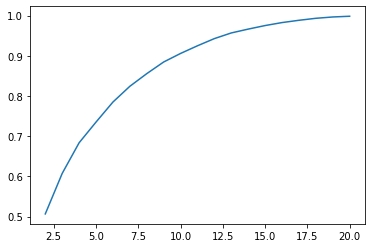

In [ ]:
# Visualisation of variance through graph
print(var_ratio)
pd.Series(var_ratio).plot()

In [ ]:
# Reducing features through pca
pc_final=PCA(n_components=7).fit(credit_scale)

reduced_cr=pc_final.fit_transform(credit_scale)

In [ ]:
credit_df = pd.DataFrame(reduced_cr)

In [ ]:
credit_df.head()

,0,1,2,3,4,5,6
0,-0.875147,-2.897850,-0.481606,-0.091027,0.510523,0.128575,-0.053286
1,-3.397161,2.829102,-0.228582,1.747860,1.105386,-1.100661,-0.117553
2,1.164266,0.108959,2.541427,-1.490582,0.506488,1.450912,-0.777921
3,-0.121764,-0.308821,2.695231,-0.414675,1.331275,0.826630,0.928160
4,-1.468522,-1.670091,1.553417,-1.834190,0.010900,0.706727,-0.611595


So initially we had 23 variables now its 7 so our variable go reduced

In [ ]:
credit_df.shape

(8950, 7)

# Model creation:
# Clustering
Based on the intuition on type of purchases made by customers and their distinctive behavior exhibited based on the purchase_type (as visualized above in Insights from KPI) , I am starting with 4 clusters.

In [ ]:
from sklearn.cluster import KMeans
kmeans_4 = KMeans(n_clusters=4,random_state=123)
kmeans_4.fit(reduced_cr)
kmeans_4.labels_

array([0, 1, 3, ..., 0, 3, 3], dtype=int32)

In [ ]:
pd.Series(kmeans_4.labels_).value_counts()

3    3138
0    2757
1    1557
2    1498
dtype: int64

In [ ]:
# Metrics will check the accuracy of the model
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(reduced_cr,kmeans_4.labels_)

0.24184728483847157

Metrics score is not very fine we can check it more with different cluster value
# Visualisation with 4 cluster





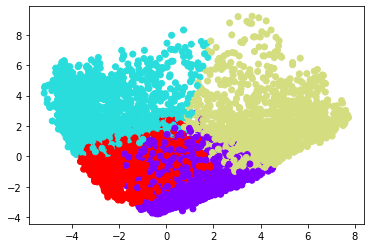

In [ ]:
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c= kmeans_4.labels_, cmap = 'rainbow')
plt.show()

Data is overlapped with eachother

Try to find better cluster with elbow method

In [ ]:
wcss = []
for i in range (1,10):
    kmeans = KMeans(i)
    kmeans.fit(reduced_cr)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

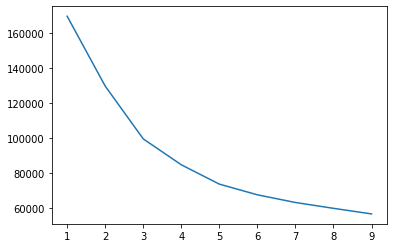

In [ ]:
plt.plot(range(1,10),wcss)

From above we can see elbow bending on 3,4,5 so we check for all. We already checked model for 4 so now for 3 and 5

In [ ]:
# for 3 cluster
kmeans_3 = KMeans(n_clusters=3,random_state=123)
kmeans_3.fit(reduced_cr)
kmeans_3.labels_

array([2, 0, 2, ..., 2, 2, 2], dtype=int32)

In [ ]:
pd.Series(kmeans_3.labels_).value_counts()

2    4531
0    2856
1    1563
dtype: int64

In [ ]:
# Metrics will check the accuracy of the model
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(reduced_cr,kmeans_3.labels_)

0.2624040123300472

Metrics score is not very fine but improved from 4 cluster
# Visualisation with 3 cluster


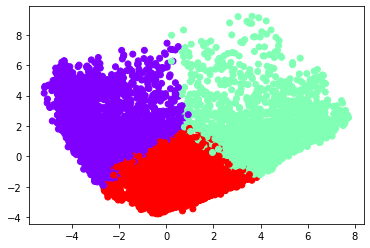

In [ ]:
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c= kmeans_3.labels_, cmap = 'rainbow')
plt.show()

Overlapping reduced but not much

In [ ]:
# for 5 cluster
kmeans_5 = KMeans(n_clusters=5,random_state=123)
kmeans_5.fit(reduced_cr)
kmeans_5.labels_

array([3, 4, 0, ..., 3, 1, 0], dtype=int32)

In [ ]:
pd.Series(kmeans_5.labels_).value_counts()

3    2807
0    1901
1    1645
2    1405
4    1192
dtype: int64

In [ ]:
# Metrics will check the accuracy of the model
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(reduced_cr,kmeans_5.labels_)

0.2707963312157572

# Data Visualisation with 5 cluster

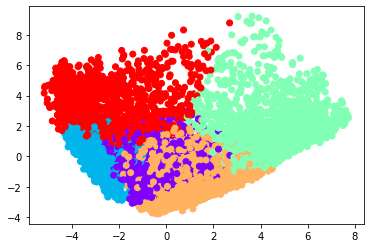

In [ ]:
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c= kmeans_5.labels_, cmap = 'rainbow')
plt.show()

With 3 cluster silhoutte coefficient and visualisation shows better result.
But we try to plot Pair plot with 3 cluster for better visualisation

In [ ]:
df_pair_plot=pd.DataFrame(reduced_cr,columns=['PC_' +str(i) for i in range(7)])
df_pair_plot['Cluster']=kmeans_3.labels_ #Add cluster column in the data frame
df_pair_plot.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,Cluster
0,-0.875147,-2.897850,-0.481606,-0.091027,0.510523,0.128575,-0.053286,2
1,-3.397161,2.829102,-0.228582,1.747860,1.105386,-1.100661,-0.117553,0
2,1.164266,0.108959,2.541427,-1.490582,0.506488,1.450912,-0.777921,2
3,-0.121764,-0.308821,2.695231,-0.414675,1.331275,0.826630,0.928160,2
4,-1.468522,-1.670091,1.553417,-1.834190,0.010900,0.706727,-0.611595,2


Data frame with cluster column is created 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


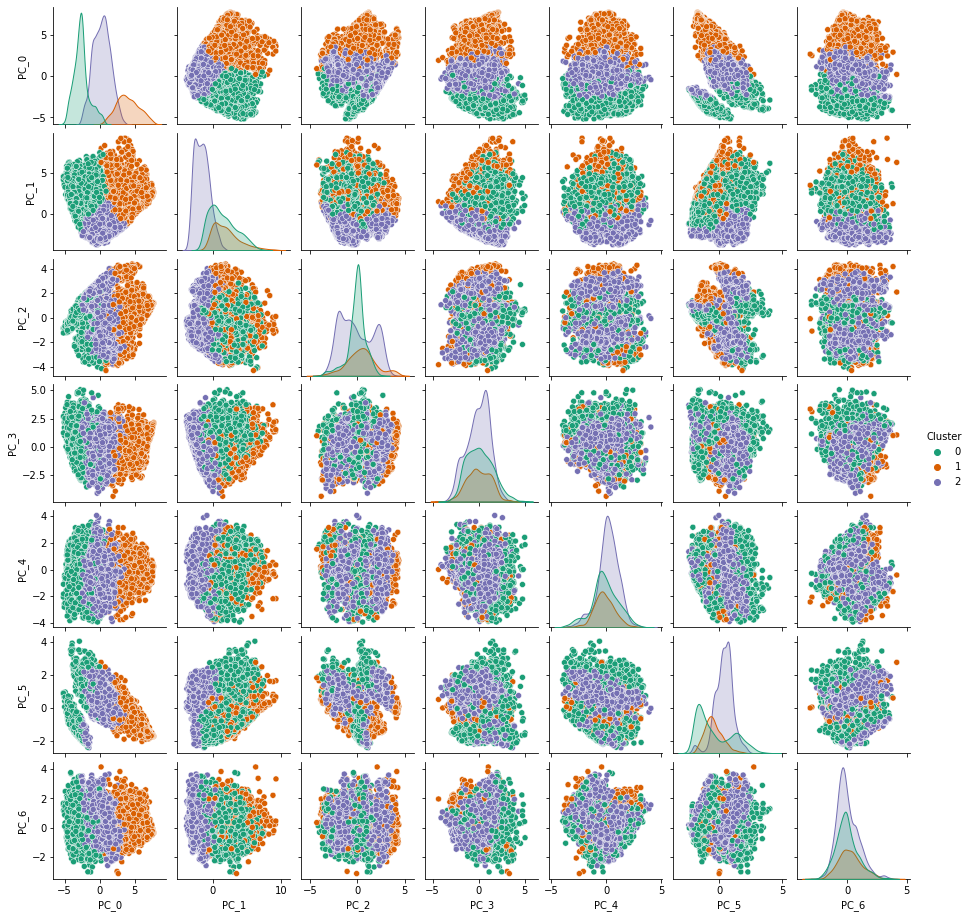

In [ ]:
#pairwise relationship of components on the data
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

Now we have done here with priciple component now we need to come bring our original data frame and we will merge the cluster with them.

In [ ]:
# Conactenating labels found through Kmeans with data 
cluster_df = pd.concat([credit,pd.Series(kmeans_3.labels_,name='Cluster_3')],axis=1)
cluster_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,istallment,none,one_off,Cluster_3
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,139.509787,0.000000,12.0,7.950000,0.000000,0.040901,1,0,0,2
1,3202.467416,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.000000,0.000000,0.250000,...,1072.340217,0.222222,12.0,0.000000,387.264093,0.457495,0,1,0,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,627.284787,0.000000,12.0,64.430833,0.000000,0.332687,0,0,1,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,864.206542,0.000000,12.0,124.916667,17.149001,0.222223,0,0,1,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,244.791237,0.000000,12.0,1.333333,0.000000,0.681429,0,0,1,2


In [ ]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_3 = cluster_df.groupby('Cluster_3')\
.apply(lambda x: x[cluster_df.columns].mean()).T
cluster_3

Cluster_3,0,1,2
BALANCE,2525.637739,2008.132377,584.207475
BALANCE_FREQUENCY,0.934320,0.974677,0.819525
PURCHASES,181.415375,2845.406754,531.467883
ONEOFF_PURCHASES,118.875500,1641.498665,243.648265
INSTALLMENTS_PURCHASES,62.261525,986.588628,284.782746
CASH_ADVANCE,2083.778240,529.488013,118.016296
PURCHASES_FREQUENCY,0.145124,0.912782,0.562235
ONEOFF_PURCHASES_FREQUENCY,0.065910,0.606533,0.149139
PURCHASES_INSTALLMENTS_FREQUENCY,0.085253,0.706981,0.422251
CASH_ADVANCE_FREQUENCY,0.305955,0.078229,0.032284


We got average of each cluster from different features.

# Insights From table

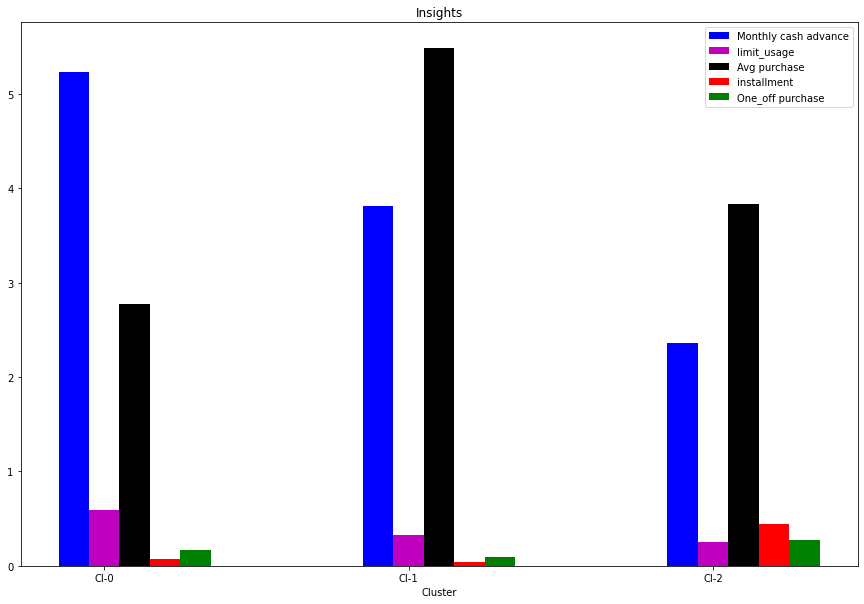

In [ ]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_3.columns))

cash_advance=np.log(cluster_3.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_3.loc['limit_usage',:].values)
purchase= np.log(cluster_3.loc['Monthly_avg_purchase',:].values)
installment=cluster_3.loc['istallment',:].values
one_off=cluster_3.loc['one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='limit_usage',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b5=plt.bar(index+3*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+4*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2'))
plt.legend()

# CONCLUSION:

Clusters are clearly distinguishing behavior within customers

~ cluster 0 is taking maximum advance_cash  and having less average purchase in all. both one off and installment is also very low.

~ Cluster 1 is the group of customers who have highest Monthly_avg purchases and doing both installment as well as one_off purchases, have comparatively good credit score. 

~ Cluster 2 customers are doing maximum One_Off transactions and installment transaction and also Monthly_avg_purchase is higher than cash_advance

# Marketing Strategy Suggested:

a. Group 0 -> Taking maximum cash and having low transaction it may risky group

b. Group 1 -> This group is performing well. But oneoff and installment is low so we can give reward to increase transaction.

c. Group 2 -> This group having good credit score. Using both one off and installment type payment. We can increase their limits.